In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df =pd.read_csv('data/bike-rental.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
df.shape

(17379, 17)

In [78]:
df.drop(['dteday'],axis=1,inplace=True)

In [79]:
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


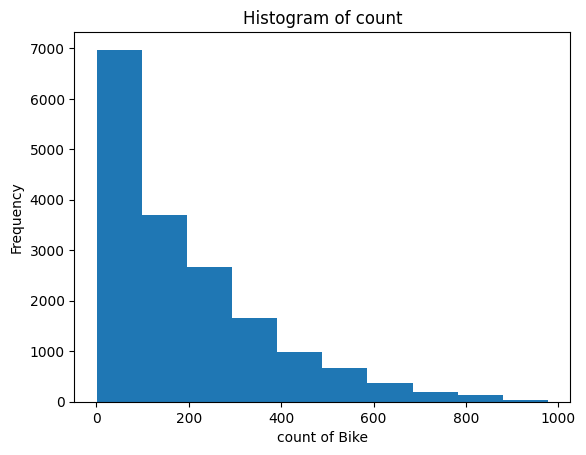

In [80]:
plt.hist(df['cnt'])
plt.xlabel('count of Bike')
plt.ylabel('Frequency')
plt.title('Histogram of count')
plt.show()

In [81]:
X= df.iloc[:,:-1]

In [82]:
X

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48


In [83]:
y=df.iloc[:,-1]

In [84]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
X_train.shape

(12165, 15)

In [87]:
y_train.shape

(12165,)

In [88]:
len(X_test)

5214

In [89]:
from sklearn.tree import  DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion ="squared_error",
                            max_depth = 8,
                            min_samples_split=10,
                            random_state=5)

In [90]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=5)

In [91]:
y_pred = reg.predict(X_test)

In [92]:
y_pred

array([427.25      ,  86.43925234,   3.35507246, ..., 548.22222222,
       295.30232558,  71.53636364])

In [93]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

77.15349257683154

In [94]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.783706084383262

In [96]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X_train,y_train,cv=10)

array([0.99735186, 0.99763954, 0.99723535, 0.99720819, 0.99684626,
       0.99599054, 0.99782344, 0.99745184, 0.997662  , 0.99748096])